<a href="https://colab.research.google.com/github/kdy4049067/gradient/blob/main/Assignment_Introduction_to_ML_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework: Multi-Layer Perceptron and Gradient Descent

문제를 차분히 읽어보고 코드를 작성하고, 설명하세요. 답안은 영어/국문 모두 상관없습니다.

Following codes are training MLP for [dataset](https://raw.githubusercontent.com/tufts-ml-courses/cs135-23f-assignments/main/hw3/data_flower/) using Keras.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 0. Helper codes

In [ ]:
import os
import numpy as np
import pandas as pd
import time
import warnings

from sklearn.neural_network import MLPClassifier
import sklearn.metrics

from tensorflow import keras
import requests

In [ ]:
# import plotting libraries
import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns
sns.set('notebook', font_scale=1.25, style='whitegrid')

In [ ]:
dataset_URL = "https://raw.githubusercontent.com/tufts-ml-courses/cs135-23f-assignments/main/hw3/data_flower/"

In [ ]:
url = dataset_URL + "x_test.csv"
c = pd.read_csv(url, on_bad_lines='skip')

In [ ]:
# Load training data
train_input = pd.read_csv(dataset_URL + 'x_train.csv', skiprows=1, delimiter=',').to_numpy()
train_target = pd.read_csv(dataset_URL + 'y_train.csv', skiprows=1, delimiter=',').to_numpy()

# Load test data
test_input = pd.read_csv(dataset_URL + 'x_test.csv', skiprows=1, delimiter=',').to_numpy()
test_target = pd.read_csv(dataset_URL + 'y_test.csv', skiprows=1, delimiter=',').to_numpy()

assert train_input.shape[0] == train_target.shape[0]
assert test_input.shape[0] == test_target.shape[0]

train_target = train_target.flatten()
test_target = test_target.flatten()

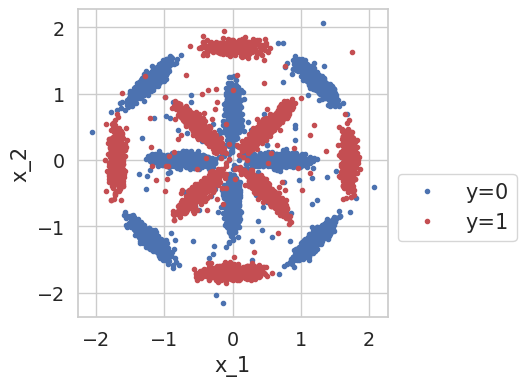

In [ ]:
fig, _ = plt.subplots(figsize=(4,4));
plt.plot(train_input[(train_target == 0).flatten(), 0], train_input[(train_target == 0).flatten(), 1], 'b.', label='y=0');
plt.plot(train_input[(train_target == 1).flatten(), 0], train_input[(train_target == 1).flatten(), 1], 'r.', label='y=1');
plt.legend(bbox_to_anchor=[1.0, 0.5], fontsize=15);
plt.xlabel('x_1'); plt.ylabel('x_2');

In [ ]:
from tensorflow import keras

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Dense(16, activation='relu', input_shape=(2,)))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │            48 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,137 (4.44 KB)

 Trainable params: 1,137 (4.44 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=keras.optimizers.SGD(learning_rate=0.05))

In [ ]:
history = model.fit(train_input, train_target,
          validation_data = (test_input, test_target),
          epochs=15, batch_size = 32, verbose = 0)

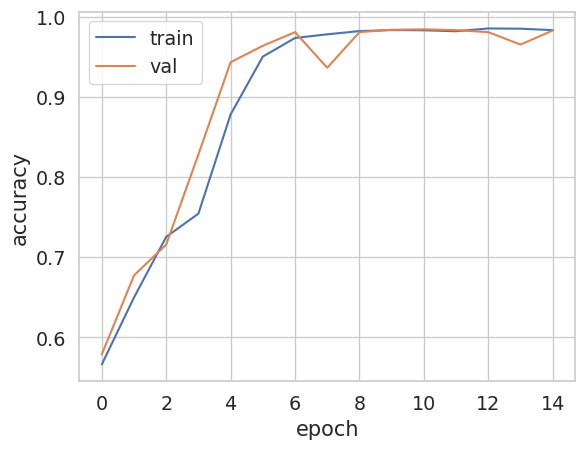

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'val'])
plt.show()

## Visualize the output

In [ ]:
def visualize_network(model, train_input, train_target):
  # -1에서 1 사이의 균일한 값 생성
  num_points = 100  # 원하는 점의 개수
  x = np.linspace(-2, 2, num_points)
  y = np.linspace(-2, 2, num_points)

  # 2D 그리드 생성
  xx, yy = np.meshgrid(x, y)

  # 2D 그리드를 하나의 numpy array로 변환
  data = np.vstack([xx.ravel(), yy.ravel()]).T

  res = model.predict(data)

  plt.figure(figsize=(10, 8))
  plt.scatter(data[:, 0], data[:, 1], c=res[:, 0], cmap='coolwarm', alpha=0.7)
  plt.plot(train_input[(train_target == 0).flatten(), 0], train_input[(train_target == 0).flatten(), 1], 'b.', label='y=0');
  plt.plot(train_input[(train_target == 1).flatten(), 0], train_input[(train_target == 1).flatten(), 1], 'r.', label='y=1');
  plt.colorbar(label='Result Value')
  plt.xlabel('X Coordinate')
  plt.ylabel('Y Coordinate')
  plt.title('Scatter plot with color representing result value')
  plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


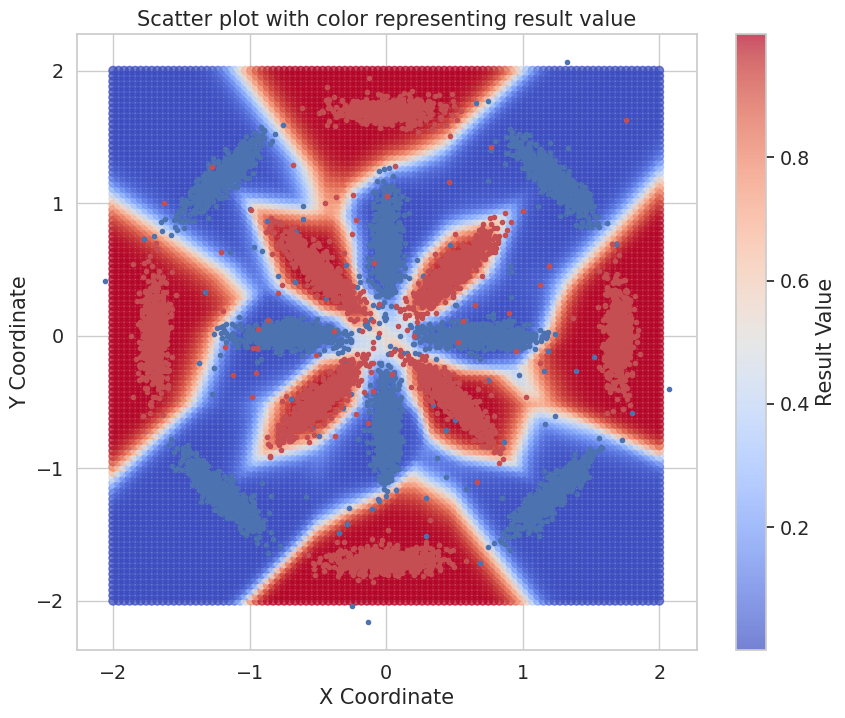

In [ ]:
visualize_network(model, train_input, train_target)

## Task 1: Deep Neural Network

Make a network with only a single layer, train it, and visualize using `visualize_network`.

How does it look? Explain why.

How can we change the structure of the network?

### Important Notes:

* You can use any ML library you want for Task 1, but try to implement by yourself using **numpy native functions**; it will be helpful for your understanding and Tasks 2 and 3.

In [ ]:
# define model
class SimpleNeuralNetwork:
    def __init__(self, input_dim):
        self.weights = np.random.randn(input_dim) * 0.01  # 가중치 초기화
        self.bias = 0.0  # 편향 초기화

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        return self.sigmoid(z)



In [ ]:
# train
def train(model, X, y, epochs=1000, lr=0.1):
    for epoch in range(epochs):
        preds = model.predict(X)
        error = preds - y

        # 평균 제곱 오차 기준 gradient 계산
        grad_w = np.dot(X.T, error) / len(X)
        grad_b = np.mean(error)

        # 파라미터 업데이트
        model.weights -= lr * grad_w
        model.bias -= lr * grad_b




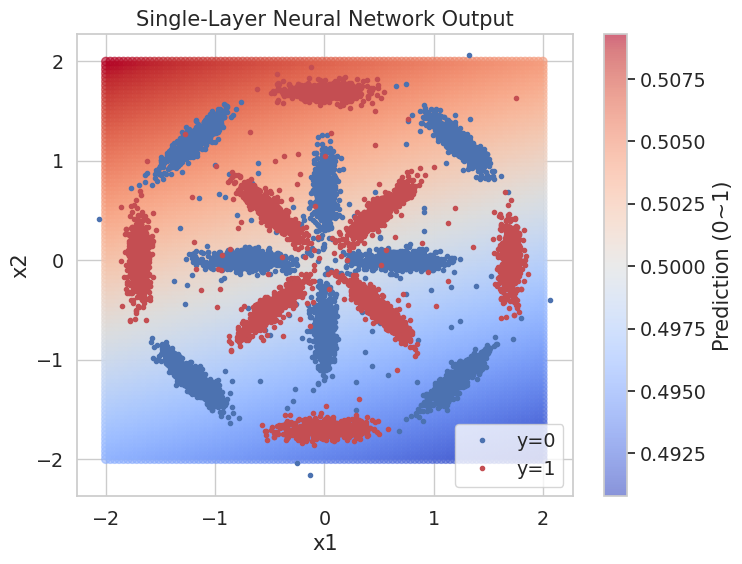

In [ ]:
# visualize
def visualize_network(model, train_input, train_target):
    x = np.linspace(-2, 2, 100)
    y = np.linspace(-2, 2, 100)
    xx, yy = np.meshgrid(x, y)
    data = np.vstack([xx.ravel(), yy.ravel()]).T

    res = model.predict(data)

    plt.figure(figsize=(8, 6))
    plt.scatter(data[:, 0], data[:, 1], c=res, cmap='coolwarm', alpha=0.6)
    plt.plot(train_input[train_target == 0, 0], train_input[train_target == 0, 1], 'b.', label='y=0')
    plt.plot(train_input[train_target == 1, 0], train_input[train_target == 1, 1], 'r.', label='y=1')
    plt.colorbar(label='Prediction (0~1)')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Single-Layer Neural Network Output')
    plt.legend()
    plt.show()

# -----------------------------
# 실행
# -----------------------------
model = SimpleNeuralNetwork(input_dim=2)   # define model
train(model, train_input, train_target, epochs=1000, lr=0.1)  # train
visualize_network(model, train_input, train_target)  # visualize


## Answer 1:

1. How does it look? Explain why:
데이터의 분포를 제대로 학습 못하고 있는 것 처럼 보인다. 출력값이 대부분 0.5 근처에 모여있는 것으로 보아 모델이 0과 1을 잘 구분하지 못하고 있는 것으로 보인다. 현재 입력층 -> 출력층만 있는 단일 계층 구조이므로 선형적인 경계만 만들 수 있기 때문에 제대로 학습할 수 없다.
(your answer here)

2. How can we change the structure of the network?
복잡한 데이터를 잘 학습하도록 하기 위해서는 다층 신경망으로 바꾸어야 하므로 은닉층을 추가해야 한다. 은닉층은 ReLu, sigmoid 등 비선형 activation function을 사용해야 한다.
(your answer here)


## Task 2: Forward Pass Method

Implement the forward pass of the exact same network.

| Layer (type)  | Output Shape | Param # |
|---------------|---------------|---------|
| dense (Dense) | (None, 16)    | 48      |
| dense_1 (Dense)| (None, 32)   | 544     |
| dense_2 (Dense)| (None, 16)   | 528     |
| dense_3 (Dense)| (None, 1)    | 17      |


## Task 3: Training the Neural Network

Implement the training of **the same** network as in the Keras example.

Basic settings are given as follows, but feel free to modify:

* Loss function: binary cross-entropy
* Optimizer: SGD with learning rate 0.05
* Epochs: 15
* Batch size: 32

### Important Notes:

* Implement the training of the network by finishing the skeleton code below.
* **Do not** use ML libraries such as Keras or PyTorch.
* Only **NumPy functions** are allowed.
* Make comments detailed. They will be considered as part of the report.
* Never cheat by using AI tools like Gemini or ChatGPT to do your homework.


In [ ]:
## Skeleton code
import numpy as np

class flowerNet():
  def __init__(self):
    self.w1 = None
    self.b1 = None
    self.w2 = None
    self.b2 = None
    self.w3 = None
    self.b3 = None
    self.w4 = None
    self.b4 = None

    self.learning_rate = 0.05

  def predict(self, x):
        def sigmoid(z):
            return 1 / (1 + np.exp(-z))
        def relu(z):
            return np.maximum(0, z)

        # 가중치 초기화 (처음 호출 시)
        if self.w1 is None:
            np.random.seed(42)
            input_dim = x.shape[1]
            self.w1 = np.random.randn(input_dim, 16) * 0.1
            self.b1 = np.zeros(16)
            self.w2 = np.random.randn(16, 32) * 0.1
            self.b2 = np.zeros(32)
            self.w3 = np.random.randn(32, 16) * 0.1
            self.b3 = np.zeros(16)
            self.w4 = np.random.randn(16, 1) * 0.1
            self.b4 = np.zeros(1)

        # forward 연산
        z1 = x @ self.w1 + self.b1
        a1 = relu(z1)
        z2 = a1 @ self.w2 + self.b2
        a2 = relu(z2)
        z3 = a2 @ self.w3 + self.b3
        a3 = relu(z3)
        z4 = a3 @ self.w4 + self.b4
        a4 = sigmoid(z4)

        # 0.5 기준으로 분류
        preds = (a4 > 0.5).astype(int).flatten()
        return preds

  def train(self, x, y_target):
        def sigmoid(z):
            return 1 / (1 + np.exp(-z))
        def relu(z):
            return np.maximum(0, z)
        def relu_deriv(z):
            return (z > 0).astype(float)
        def binary_cross_entropy(y_pred, y_true):
            eps = 1e-7
            y_pred = np.clip(y_pred, eps, 1 - eps)
            return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

        x = (x - np.mean(x, axis=0)) / (np.std(x, axis=0) + 1e-7)

        # 가중치 초기화
        if self.w1 is None:
            np.random.seed(42)
            input_dim = x.shape[1]
            self.w1 = np.random.randn(input_dim, 16) * 0.1
            self.b1 = np.zeros(16)
            self.w2 = np.random.randn(16, 32) * 0.1
            self.b2 = np.zeros(32)
            self.w3 = np.random.randn(32, 16) * 0.1
            self.b3 = np.zeros(16)
            self.w4 = np.random.randn(16, 1) * 0.1
            self.b4 = np.zeros(1)

        n_samples = x.shape[0]

        for epoch in range(15):
            perm = np.random.permutation(n_samples)
            x_shuffled = x[perm]
            y_shuffled = y_target[perm]

            losses = []

            for i in range(0, n_samples, 16):
                xb = x_shuffled[i:i+16]
                yb = y_shuffled[i:i+16]

                # Forward pass
                z1 = xb @ self.w1 + self.b1
                a1 = relu(z1)
                z2 = a1 @ self.w2 + self.b2
                a2 = relu(z2)
                z3 = a2 @ self.w3 + self.b3
                a3 = relu(z3)
                z4 = a3 @ self.w4 + self.b4
                a4 = sigmoid(z4)


                loss = binary_cross_entropy(a4, yb.reshape(-1, 1))
                losses.append(loss)

                m = yb.shape[0]
                dz4 = (a4 - yb.reshape(-1,1)) / m

                dW4 = a3.T @ dz4
                db4 = np.sum(dz4, axis=0)

                da3 = dz4 @ self.w4.T
                dz3 = da3 * relu_deriv(z3)

                dW3 = a2.T @ dz3
                db3 = np.sum(dz3, axis=0)

                da2 = dz3 @ self.w3.T
                dz2 = da2 * relu_deriv(z2)

                dW2 = a1.T @ dz2
                db2 = np.sum(dz2, axis=0)

                da1 = dz2 @ self.w2.T
                dz1 = da1 * relu_deriv(z1)

                dW1 = xb.T @ dz1
                db1 = np.sum(dz1, axis=0)

                # Gradient descent update
                self.w4 -= self.learning_rate * dW4
                self.b4 -= self.learning_rate * db4
                self.w3 -= self.learning_rate * dW3
                self.b3 -= self.learning_rate * db3
                self.w2 -= self.learning_rate * dW2
                self.b2 -= self.learning_rate * db2
                self.w1 -= self.learning_rate * dW1
                self.b1 -= self.learning_rate * db1

            print(f"Epoch {epoch+1}/{15} - Loss: {np.mean(losses):.4f}")

In [ ]:
# define model
myModel = flowerNet()

In [ ]:
# accuracy before training
y = myModel.predict(train_input)

print(f'Training accuracy: {np.sum((y > 0.5).flatten() == train_target) / len(train_target)}')

y = myModel.predict(test_input)
print(f'Validation accuracy: {np.sum((y > 0.5).flatten() == test_target) / len(test_target)}')

Training accuracy: 0.49764976497649765
Validation accuracy: 0.4957478739369685


In [ ]:
# training example
myModel.train(train_input, train_target)


Epoch 1/15 - Loss: 0.6931
Epoch 2/15 - Loss: 0.6927
Epoch 3/15 - Loss: 0.6923
Epoch 4/15 - Loss: 0.6914
Epoch 5/15 - Loss: 0.6901
Epoch 6/15 - Loss: 0.6871
Epoch 7/15 - Loss: 0.6801
Epoch 8/15 - Loss: 0.6535
Epoch 9/15 - Loss: 0.5423
Epoch 10/15 - Loss: 0.4027
Epoch 11/15 - Loss: 0.2941
Epoch 12/15 - Loss: 0.1572
Epoch 13/15 - Loss: 0.1073
Epoch 14/15 - Loss: 0.0850
Epoch 15/15 - Loss: 0.0662


In [ ]:
# accuracy after training
y = myModel.predict(train_input)

print(f'Training accuracy: {np.sum((y > 0.5).flatten() == train_target) / len(train_target)}')

y = myModel.predict(test_input)
print(f'Validation accuracy: {np.sum((y > 0.5).flatten() == test_target) / len(test_target)}')

Training accuracy: 0.9863986398639863
Validation accuracy: 0.9844922461230615


## Answer 2 and 3. Explanation of codes.

(your answer here)


### Acknowledgement

Data set from
https://www.cs.tufts.edu/comp/135/2023f/hw3.html



